In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import uproot
import numpy as np
import matplotlib.pyplot as plt

In [3]:
se_path = 'path_to_single_electron_data'
mp_path = 'path_to_multipart_data'

In [6]:
se_tree = uproot.open(se_path)['Low_Tree']
se_data = {}
se_data['part_pt'] = se_tree['particle_pt'].array(library='np')
se_data['part_e'] = se_tree['particle_e'].array(library='np')
se_data['part_eta'] = se_tree['particle_eta'].array(library='np')
se_data['part_phi'] = se_tree['particle_phi'].array(library='np')

mp_tree = uproot.open(mp_path)['Low_Tree']
mp_data = {}
mp_data['part_pt'] = mp_tree['particle_pt'].array(library='np')
mp_data['part_e'] = mp_tree['particle_e'].array(library='np')
mp_data['part_eta'] = mp_tree['particle_eta'].array(library='np')
mp_data['part_phi'] = mp_tree['particle_phi'].array(library='np')
mp_data['part_pdg'] = mp_tree['particle_pdgid'].array(library='np')

### Single electron

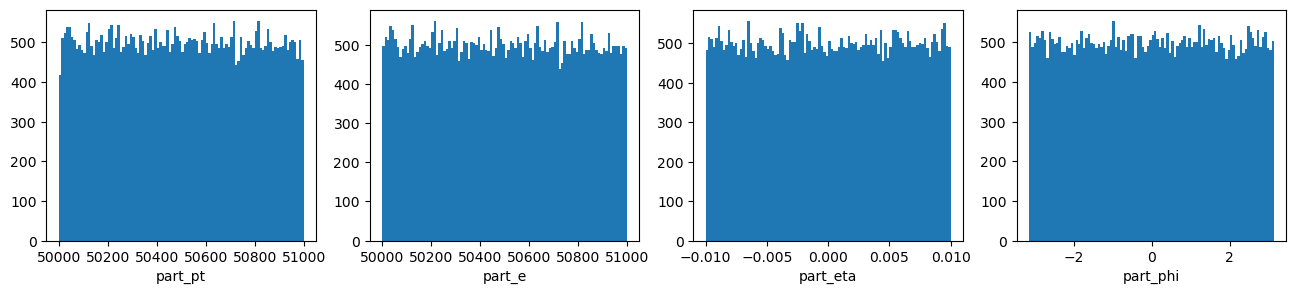

In [10]:
fig = plt.figure(figsize=(16, 3))
gs = fig.add_gridspec(1, 4)

for i, k in enumerate(['part_pt', 'part_e', 'part_eta', 'part_phi']):
    ax = fig.add_subplot(gs[0, i])
    ax.hist(np.hstack(se_data[k]), bins=100, histtype='stepfilled', label='Single-Particle')
    ax.set_xlabel(k)

### Multiple particles

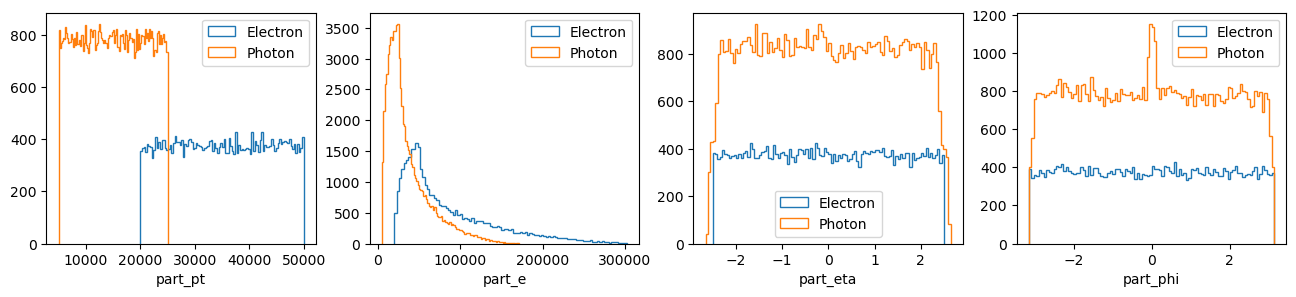

In [12]:
fig = plt.figure(figsize=(16, 3))
gs = fig.add_gridspec(1, 4)

mp_e_mask_flat = np.hstack(mp_data['part_pdg']) == 11

for i, k in enumerate(['part_pt', 'part_e', 'part_eta', 'part_phi']):
    ax = fig.add_subplot(gs[0, i])
    ax.hist(np.hstack(mp_data[k])[mp_e_mask_flat], bins=100, histtype='step', label='Electron')
    ax.hist(np.hstack(mp_data[k])[~mp_e_mask_flat], bins=100, histtype='step', label='Photon')
    ax.set_xlabel(k)
    ax.legend()

##### Cardinality

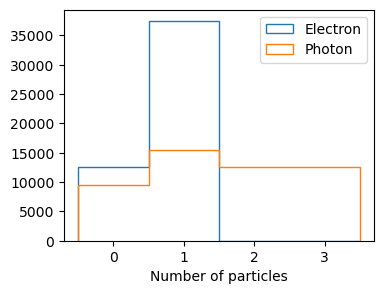

In [14]:
mp_e_card = np.array([(x == 11).sum() for x in mp_data['part_pdg']])
mp_ph_card = np.array([(x == 22).sum() for x in mp_data['part_pdg']])

comb_card = np.hstack([mp_e_card, mp_ph_card])
bins = np.arange(0, comb_card.max() + 1.5) - 0.5

fig = plt.figure(figsize=(4, 3))
ax = fig.add_subplot()

ax.hist(mp_e_card, bins=bins, histtype='step', label='Electron')
ax.hist(mp_ph_card, bins=bins, histtype='step', label='Photon')
ax.set_xlabel('Number of particles')
ax.legend()

##### distance among particles

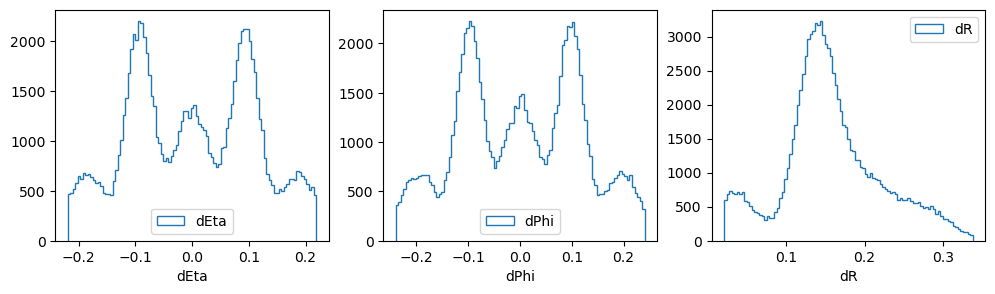

In [17]:
mp_del_etas = []; mp_del_phis = []
for i in range(len(mp_data['part_eta'])):
    n_part = len(mp_data['part_eta'][i])
    for j in range(n_part):
        for k in range(j + 1, n_part):
            mp_del_etas.append(mp_data['part_eta'][i][j] - mp_data['part_eta'][i][k])
            mp_del_phis.append(mp_data['part_phi'][i][j] - mp_data['part_phi'][i][k])
mp_del_etas = np.array(mp_del_etas)
mp_del_phis = np.array(mp_del_phis)

del_rs = np.sqrt(mp_del_etas**2 + mp_del_phis**2)

fig = plt.figure(figsize=(12, 3))
gs = fig.add_gridspec(1, 3)

for i, (d, l) in enumerate(zip([mp_del_etas, mp_del_phis, del_rs], ['dEta', 'dPhi', 'dR'])):
    ax = fig.add_subplot(gs[0, i])
    bins = np.linspace(np.percentile(d, 2), np.percentile(d, 98), 100)

    ax.hist(d, bins=bins, histtype='step', label=l)
    ax.set_xlabel(l)
    ax.legend()